<a href="https://colab.research.google.com/github/sinthu1996/githubabc/blob/main/HandWritternCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Handwritten equation solver using CNN
   

#Importing

  Importing library

In [2]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,SimpleRNN, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import cv2
from google.colab.patches import cv2_imshow

In [3]:
def extractImages(datadir):
    # Get the data
    imagesData = []
    imagesLabel = []
    for folder in os.listdir(datadir):
        path = os.path.join(datadir, folder)
        for images in os.listdir(path):
            img = cv2.imread(os.path.join(path, images), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (32, 32))
            imagesData.append(img)
            imagesLabel.append(folder)

    combined = list(zip(imagesData, imagesLabel))
    random.shuffle(combined)
    imagesData, imagesLabel = zip(*combined)

    return (imagesData, imagesLabel)

  # Loading the data

In [4]:

!wget https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip
!unzip -qo data.zip

--2025-02-06 07:41:46--  https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.66.56, 16.12.36.119, 52.219.158.127, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.66.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28437489 (27M) [application/x-zip-compressed]
Saving to: ‘data.zip’

data.zip            100%[===================>]  27.12M  11.4MB/s    in 2.4s    

2025-02-06 07:41:49 (11.4 MB/s) - ‘data.zip’ saved [28437489/28437489]



In [5]:
def download_csv(datadir):
    imagesData = []
    imagesLabel = []
    for folder in os.listdir(datadir):
        path = os.path.join(datadir, folder)
        for image in os.listdir(path):
            img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (32, 32))
            img = img.flatten()
            imagesData.append(img)
            imagesLabel.append(folder)

    combined = list(zip(imagesData, imagesLabel))
    random.shuffle(combined)
    imagesData, imagesLabel = zip(*combined)

    return np.array(imagesData), np.array(imagesLabel)

data_dir = '/content/data/dataset'

imagesData, imagesLabel = download_csv(data_dir)

X = np.array(imagesData)
X = X / 255.0
Y = np.array(imagesLabel)
df_X = pd.DataFrame(X)
df_X['label'] = Y
df_X.to_csv('data.csv', index=False)


In [6]:
img=cv2.imread('/content/data/dataset/div/%_1_1.png')
cv2_imshow(img)

In [7]:
df=pd.read_csv('data.csv')
df.head()


,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,add
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,add
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,mul


In [9]:

imagesData = []
imagesLabel = []
data_dir = '/content/data/dataset'
imagesData, imagesLabel = extractImages(data_dir)
print("Number of images: ",len(imagesData))
print("Labels:",list(set(imagesLabel)))


Number of images:  7600
Labels: ['div', '6', '9', '0', '5', '1', 'add', '2', '7', 'sub', '3', '4', 'mul', '8']


In [10]:

import os

def count_images_in_folder(folder_path):
    valid_image_extensions = {".jpg", ".png"}

    files = os.listdir(folder_path)

    image_count = sum(1 for file in files if os.path.splitext(file)[1].lower() in valid_image_extensions)

    return image_count


folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add','sub','mul','div']
image_count={}
for i in folders:
  folder_path = '/content/data/dataset/'+i
  x = count_images_in_folder(folder_path)
  image_count[i] = x
  print(f'Number of images in the folder "{folder_path}": {x}')

Number of images in the folder "/content/data/dataset/0": 595
Number of images in the folder "/content/data/dataset/1": 562
Number of images in the folder "/content/data/dataset/2": 433
Number of images in the folder "/content/data/dataset/3": 541
Number of images in the folder "/content/data/dataset/4": 526
Number of images in the folder "/content/data/dataset/5": 433
Number of images in the folder "/content/data/dataset/6": 581
Number of images in the folder "/content/data/dataset/7": 533
Number of images in the folder "/content/data/dataset/8": 554
Number of images in the folder "/content/data/dataset/9": 546
Number of images in the folder "/content/data/dataset/add": 596
Number of images in the folder "/content/data/dataset/sub": 655
Number of images in the folder "/content/data/dataset/mul": 577
Number of images in the folder "/content/data/dataset/div": 468


In [11]:

print(sum(list(image_count.values())))

7600


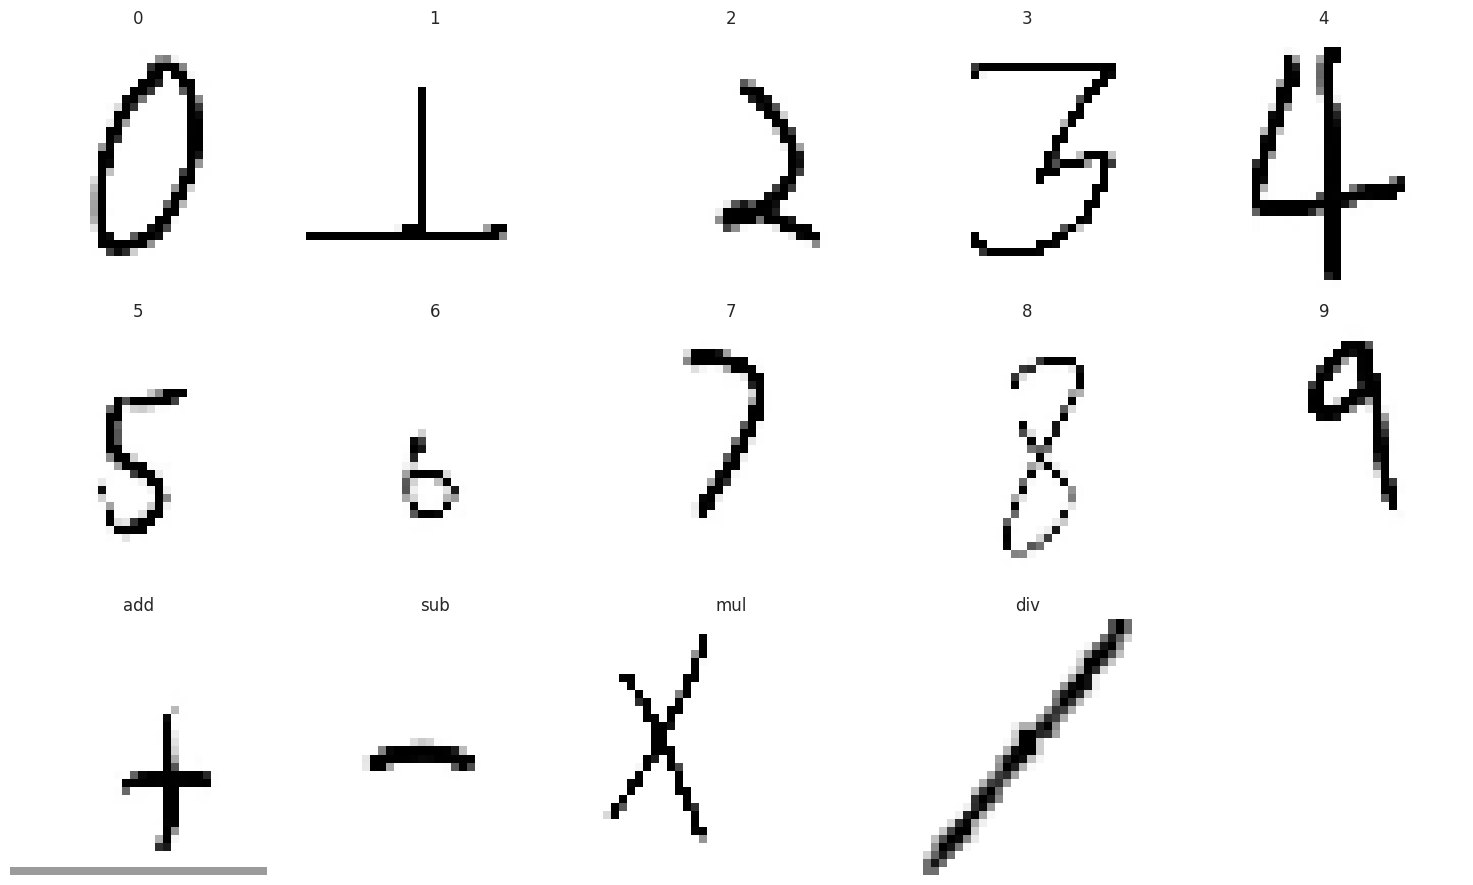

In [12]:
folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'sub', 'mul', 'div']
images = []

for folder in folders:
    folder_path = '/content/data/dataset/' + folder
    image_files = os.listdir(folder_path)
    if image_files:
        random_image_file = random.choice(image_files)
        image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        images.append(image)

images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)



fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"{folders[i]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

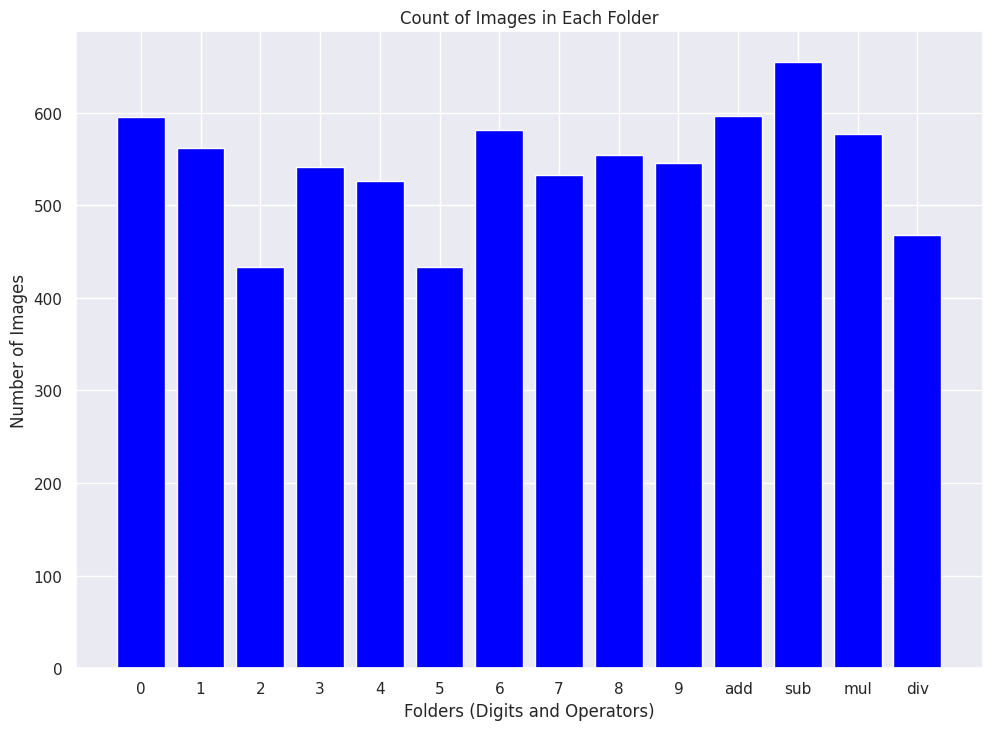

In [13]:
plt.bar(image_count.keys(), image_count.values(), color='blue')
plt.xlabel('Folders (Digits and Operators)')
plt.ylabel('Number of Images')
plt.title('Count of Images in Each Folder')
plt.show()

7600
7


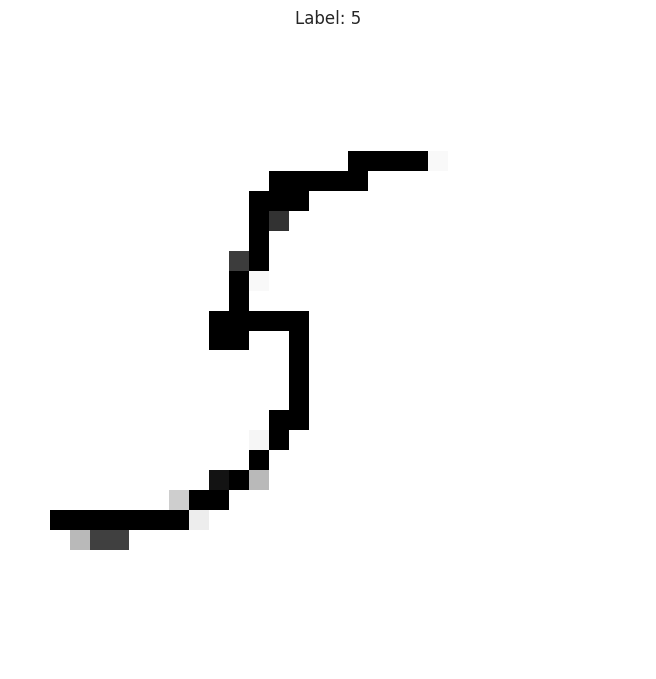

In [14]:

def display_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

print(len(imagesLabel))
x=int(input())
display_image(imagesData[x], imagesLabel[x])

In [15]:

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(imagesLabel)

In [16]:

label_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}
print(label_mapping)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'add', 11: 'div', 12: 'mul', 13: 'sub'}


In [17]:
X=np.array(imagesData)
Y=np.array(y)
X=X/255.0

In [18]:

X.shape

(7600, 32, 32)

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')

Training set size: 6080
Testing set size: 1520


In [19]:
X = np.expand_dims(X, axis=-1)
X.shape


(7600, 32, 32, 1)

In [21]:

len(np.unique(y))

14

# CNN Model

In [22]:
cnn_model=Sequential()
cnn_model.add(Conv2D(64,(3,3),input_shape=(32,32,1),activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(14, activation='softmax'))

cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,198 (426.55 KB)

 Trainable params: 109,198 (426.55 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
cnn_history = cnn_model.fit(X_train, y_train,epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - acc: 0.1433 - loss: 2.4941 - val_acc: 0.6901 - val_loss: 1.0544
Epoch 2/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - acc: 0.6435 - loss: 1.0959 - val_acc: 0.8230 - val_loss: 0.5800
Epoch 3/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - acc: 0.7632 - loss: 0.7097 - val_acc: 0.8763 - val_loss: 0.4023
Epoch 4/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - acc: 0.8222 - loss: 0.5470 - val_acc: 0.9118 - val_loss: 0.3110
Epoch 5/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - acc: 0.8620 - loss: 0.4356 - val_acc: 0.9158 - val_loss: 0.2731
Epoch 6/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - acc: 0.8705 - loss: 0.3964 - val_acc: 0.9309 - val_loss: 0.2316
Epoch 7/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - acc: 0.8949 - loss: 0.3220 - val_acc: 0.9257 - val_loss: 0.2464
Epoch 8/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - acc: 0.8951 - loss: 0.3194 - val_acc: 0.9428 - val_loss: 0.1769
Epoch 9/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 

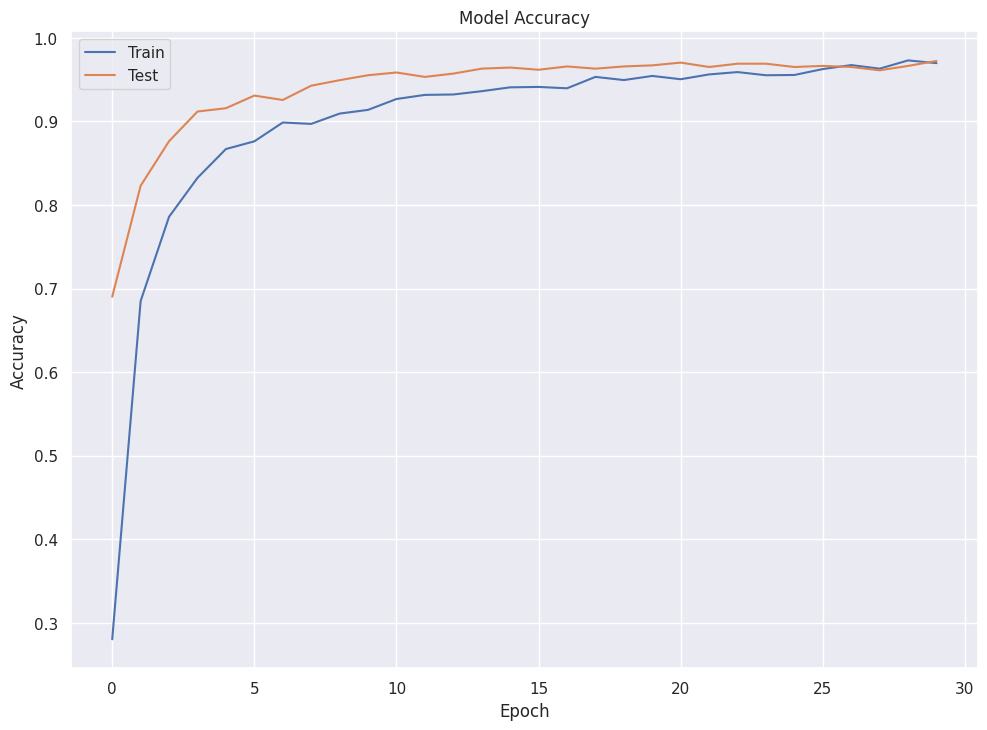

In [24]:
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [25]:
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Test accuracy of the loaded model: {accuracy * 100:.2f}%')

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9730 - loss: 0.0989
Test accuracy of the loaded model: 97.24%


In [26]:

loss, accuracy = cnn_model.evaluate(X,y)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - acc: 0.9918 - loss: 0.0331
Accuracy of the model: 99.20%


In [27]:

print(y.shape)

(7600,)


In [28]:

predictions = cnn_model.predict(X)
predictions_flat = np.argmax(predictions, axis=1)

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


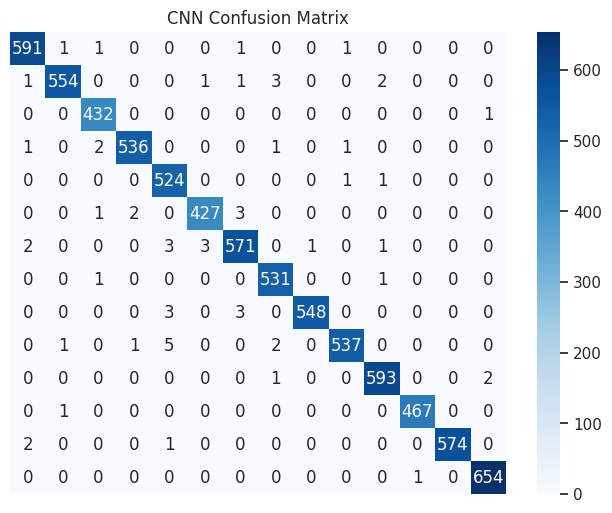

In [29]:
cm = confusion_matrix(y, predictions_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.axis('off')
plt.title("CNN Confusion Matrix")
plt.show()

In [30]:
cm = confusion_matrix(y, predictions_flat)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[591   1   1   0   0   0   1   0   0   1   0   0   0   0]
 [  1 554   0   0   0   1   1   3   0   0   2   0   0   0]
 [  0   0 432   0   0   0   0   0   0   0   0   0   0   1]
 [  1   0   2 536   0   0   0   1   0   1   0   0   0   0]
 [  0   0   0   0 524   0   0   0   0   1   1   0   0   0]
 [  0   0   1   2   0 427   3   0   0   0   0   0   0   0]
 [  2   0   0   0   3   3 571   0   1   0   1   0   0   0]
 [  0   0   1   0   0   0   0 531   0   0   1   0   0   0]
 [  0   0   0   0   3   0   3   0 548   0   0   0   0   0]
 [  0   1   0   1   5   0   0   2   0 537   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0 593   0   0   2]
 [  0   1   0   0   0   0   0   0   0   0   0 467   0   0]
 [  2   0   0   0   1   0   0   0   0   0   0   0 574   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0 654]]


In [31]:

cnn_model.save('cnn_model.h5')

In [32]:

from tensorflow.keras.models import load_model
cnn_model = load_model('cnn_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


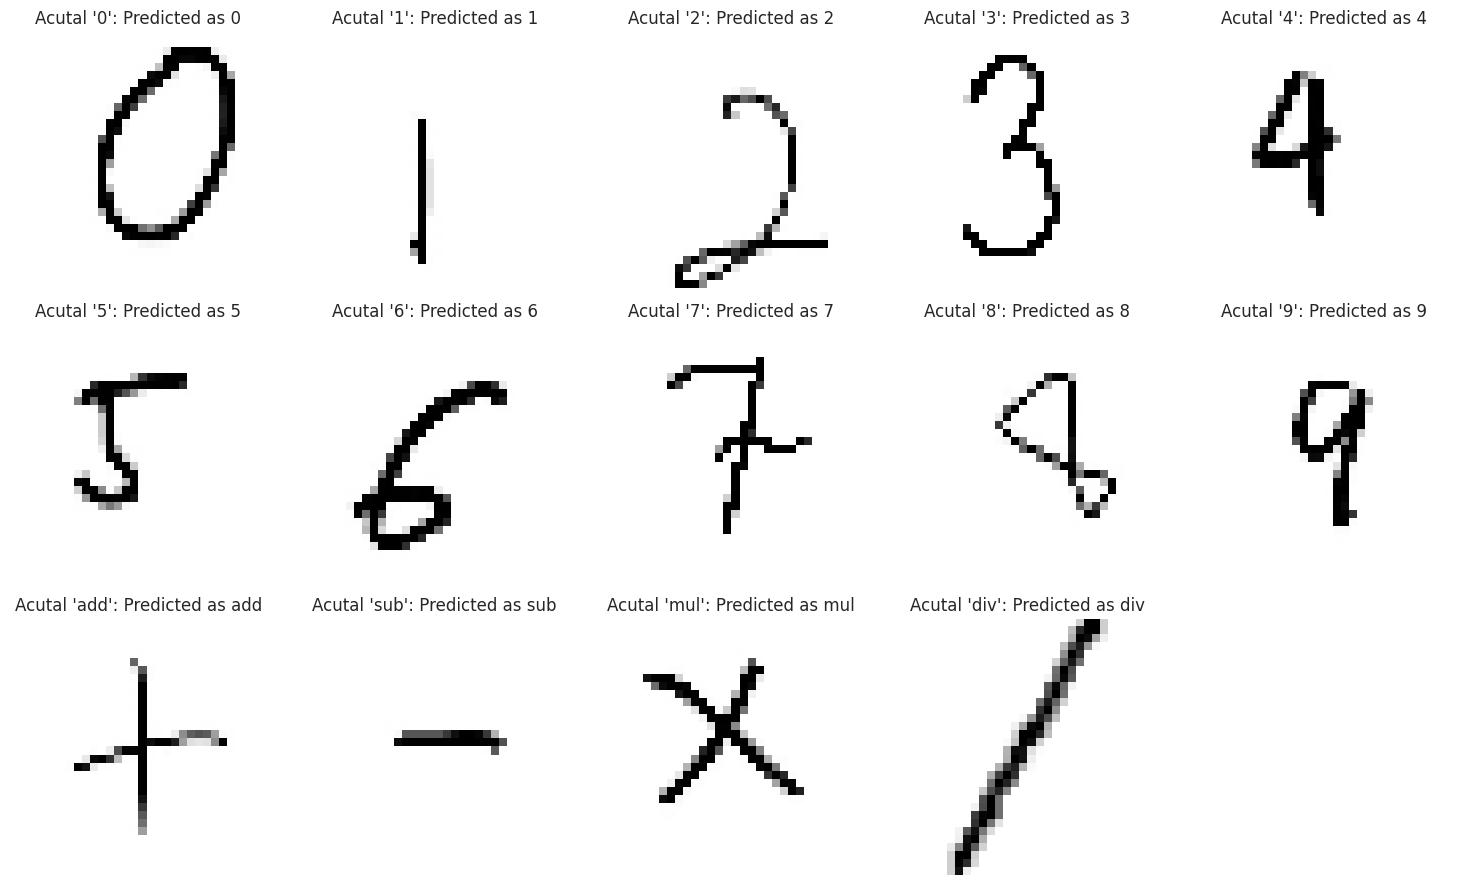

In [33]:
folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'sub', 'mul', 'div']
images = []

for folder in folders:
    folder_path = '/content/data/dataset/' + folder
    image_files = os.listdir(folder_path)
    if image_files:
        random_image_file = random.choice(image_files)
        image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        images.append(image)

images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)

predictions = cnn_model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"Acutal '{folders[i]}': Predicted as {label_mapping[predicted_labels[i]]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model  # type: ignore

labels = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '+', 11: '/', 12: '*', 13: '-'}

model = load_model('cnn_model.h5')

def predict(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = [cv2.boundingRect(contour) for contour in contours]
    sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])
    sorted_contours = [contours[i] for i in sorted_indices]

    rois = []
    padding = 15

    for contour in sorted_contours:
        x, y, w, h = cv2.boundingRect(contour)
        x_start = max(0, x - padding)
        y_start = max(0, y - padding)
        x_end = min(image.shape[1], x + w + padding)
        y_end = min(image.shape[0], y + h + padding)

        roi = image[y_start:y_end, x_start:x_end]
        roi = cv2.resize(roi, (32, 32))
        rois.append(roi)

    rois = np.array(rois)
    rois = rois / 255.0
    rois = np.expand_dims(rois, axis=-1)

    predictions = model.predict(rois)
    predicted_labels = np.argmax(predictions, axis=1)

    image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for i, contour in enumerate(sorted_contours):
        x, y, w, h = cv2.boundingRect(contour)
        label = labels[predicted_labels[i]]
        cv2.rectangle(image_color, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image_color, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    equation = ''.join(labels[predicted_labels[i]] for i in range(len(predicted_labels)))
    print(f'Predicted equation: {equation}')
    print(f'Result: {eval(equation)}')

In [38]:

predict('test2.png')

ValueError: math domain error

In [39]:

Predicted equation: 10-4
Result: 6


SyntaxError: invalid syntax (<ipython-input-39-f828f5e3c14e>, line 1)

 # Conclusion
In conclusion, the handwritten equation solver utilizing deep learning techniques, including Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs), has demonstrated promising accuracy levels. The CNN-based approach achieved an impressive accuracy of 97.57%, while the RNN-based method achieved a respectable accuracy of 76.32%.


The CNN model excelled in accurately recognizing and classifying individual handwritten characters within the equations. Its ability to effectively capture spatial hierarchies and local patterns in the input images contributed to its high accuracy. With its deep layers and convolutional operations, the CNN was capable of learning complex features directly from the pixel values, enabling robust classification of handwritten characters.